In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv('../data/train.csv')
test= pd.read_csv('../data/test.csv')

# trying to see if test set differs from train set

In [3]:
pd.DataFrame([train.count(),test.count()], index=['train_set', 'test_set']).T

,train_set,test_set
Id,1460.0,1459.0
MSSubClass,1460.0,1459.0
MSZoning,1460.0,1455.0
LotFrontage,1201.0,1232.0
LotArea,1460.0,1459.0
Street,1460.0,1459.0
Alley,91.0,107.0
LotShape,1460.0,1459.0
LandContour,1460.0,1459.0
Utilities,1460.0,1457.0


it seems there is no big difference in null values.
lets clean some sparse variables. every variable below 10% will be cut out.

In [4]:
cut_out=train.columns[train.count().values<0.1*len(train)].tolist()
cut_out

['Alley', 'PoolQC', 'MiscFeature']

In [5]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [6]:
train.drop(cut_out,axis=1,inplace=True)
test.drop(cut_out,axis=1,inplace=True)

In [7]:
train.shape, test.shape

((1460, 78), (1459, 77))

next step we will check difference in distibutions

In [8]:
numeric_c=[]
cat_c=[]
for c in train.columns.tolist():
    if train[c].dtypes=='int64' or train[c].dtypes=='float64':
        numeric_c.append(c)
    else:
        cat_c.append(c)
     

removing 2 variables- Id is not a variable and SalePrice is not in test set

In [9]:
numeric_c.remove('Id')
numeric_c.remove('SalePrice')

C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GU

C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


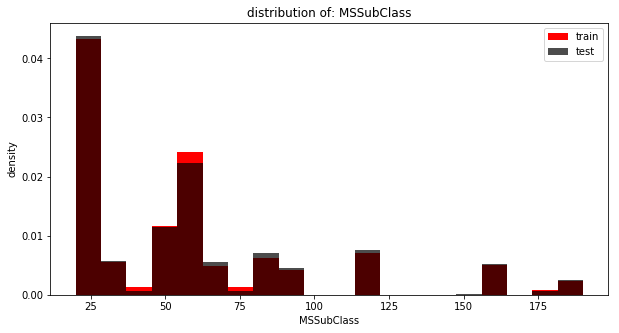

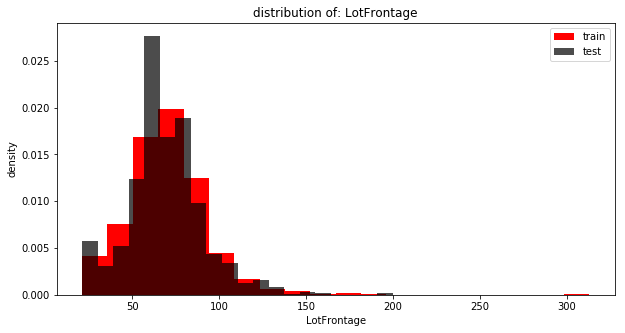

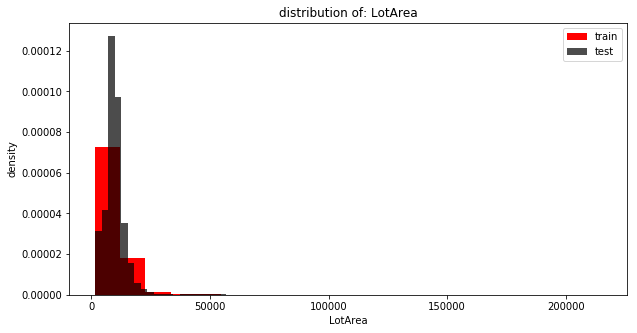

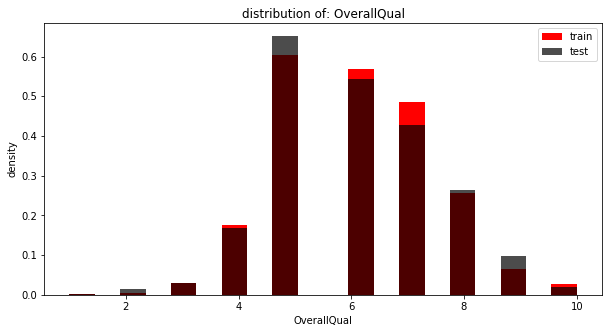

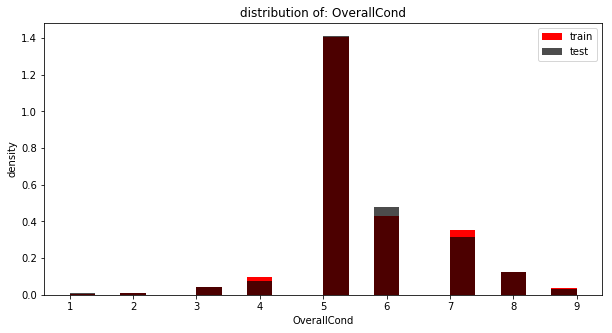

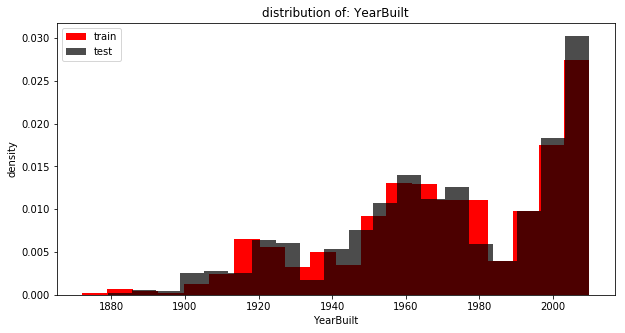

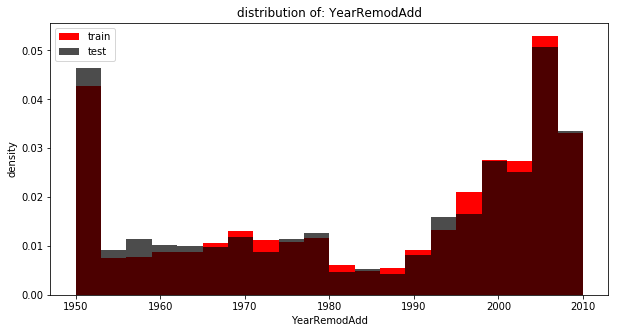

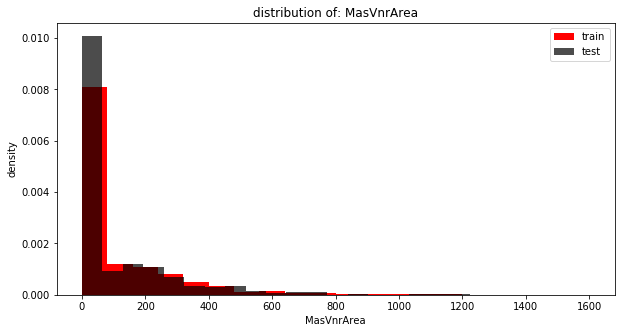

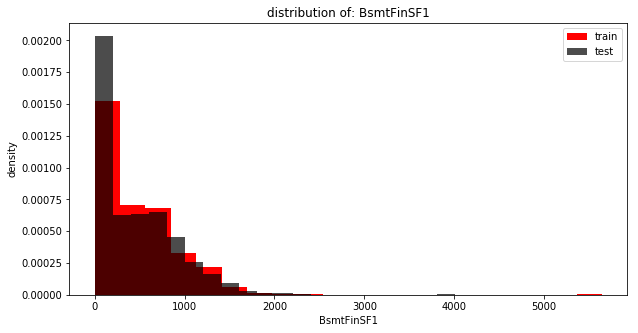

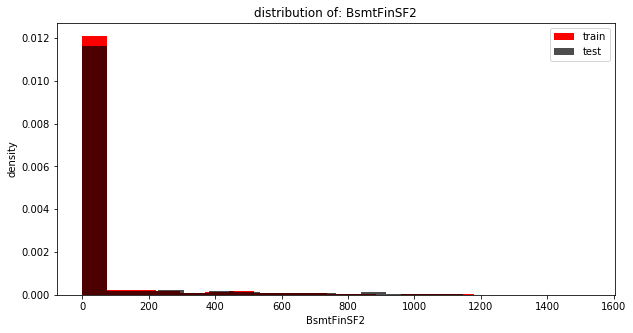

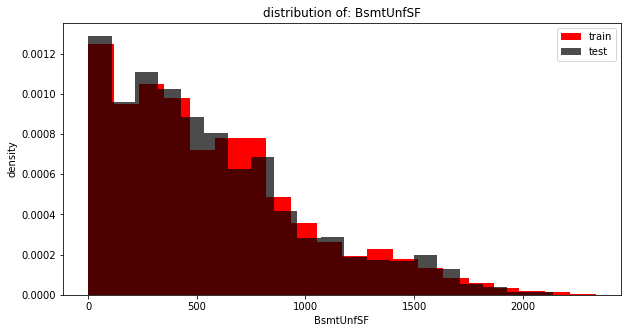

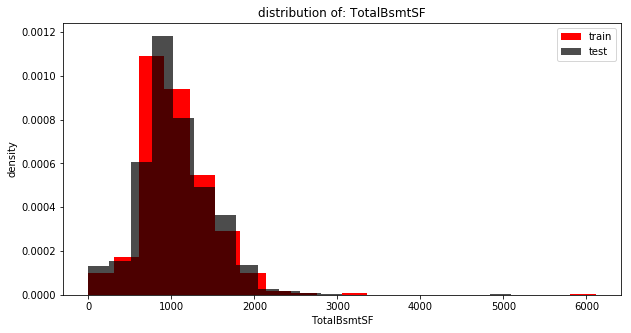

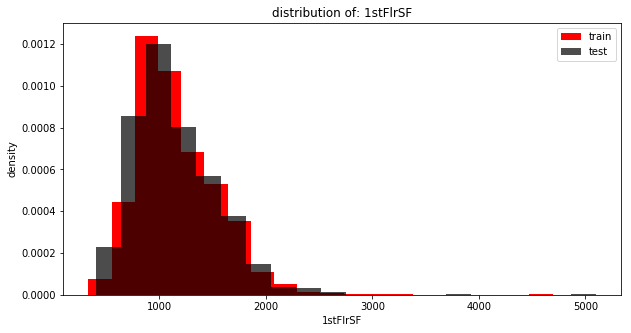

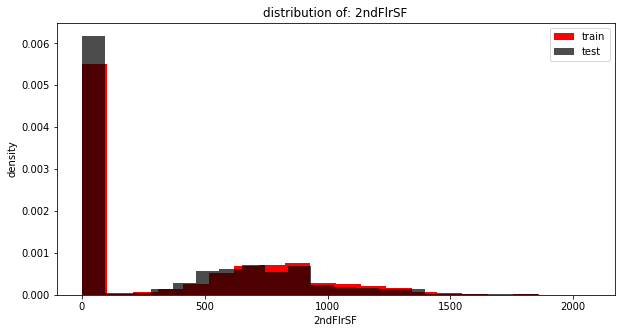

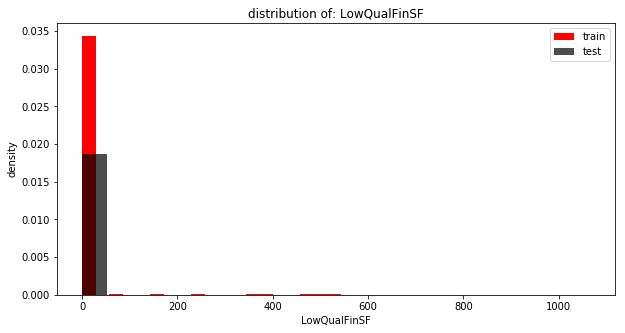

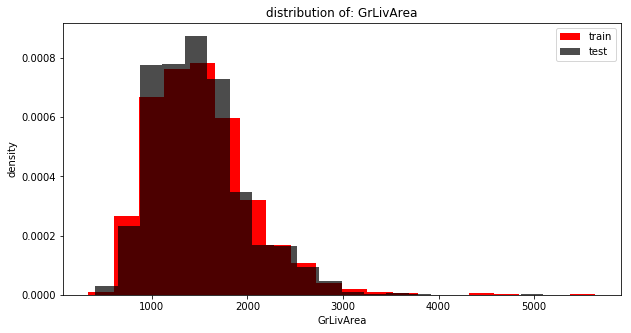

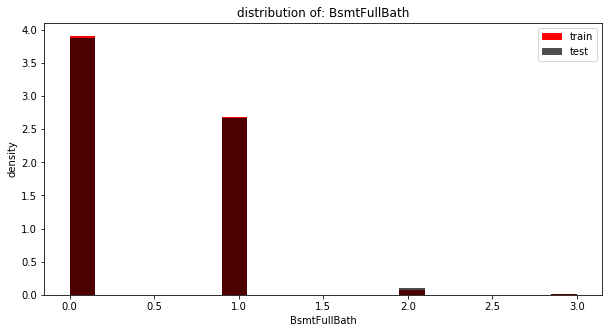

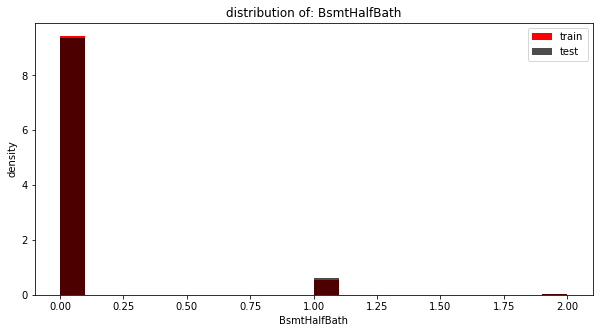

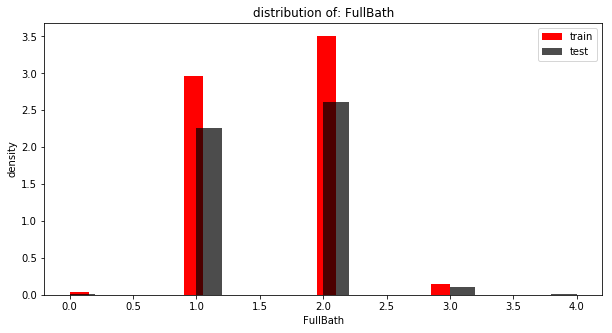

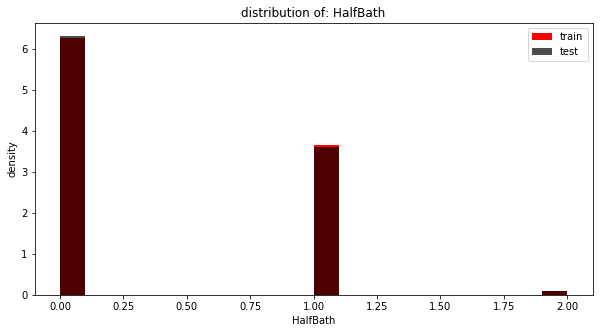

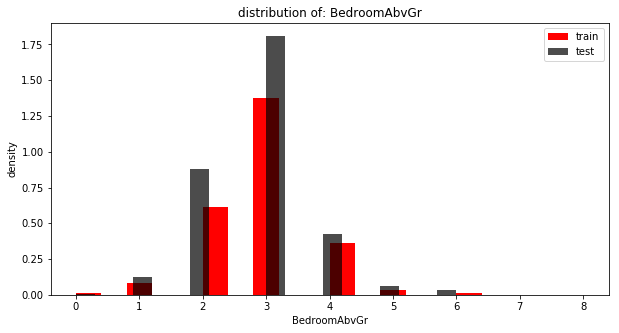

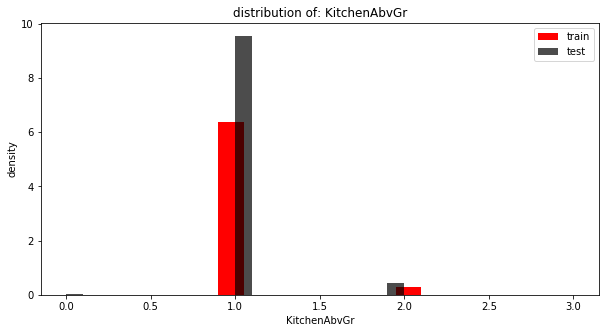

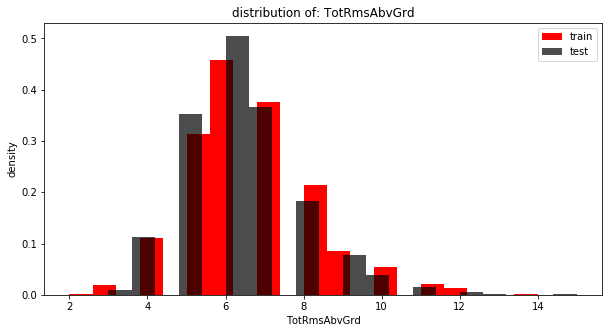

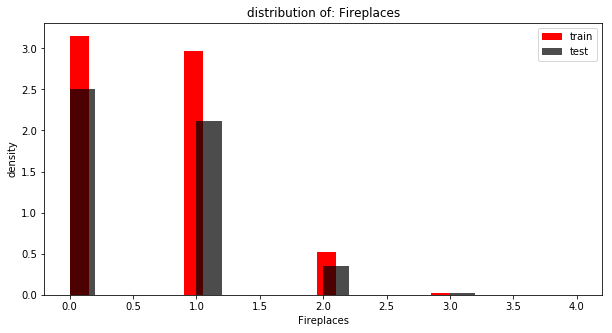

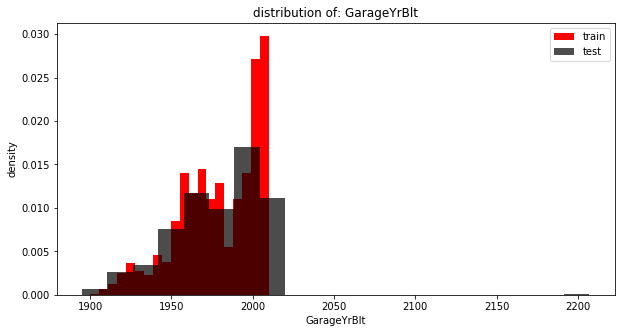

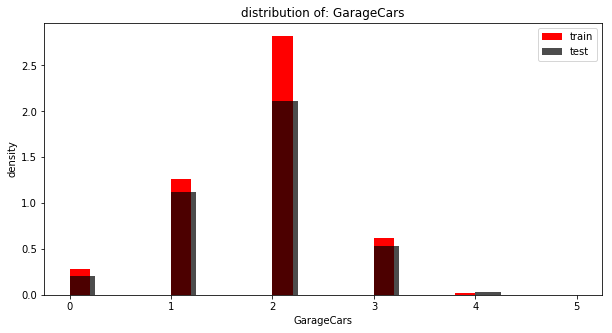

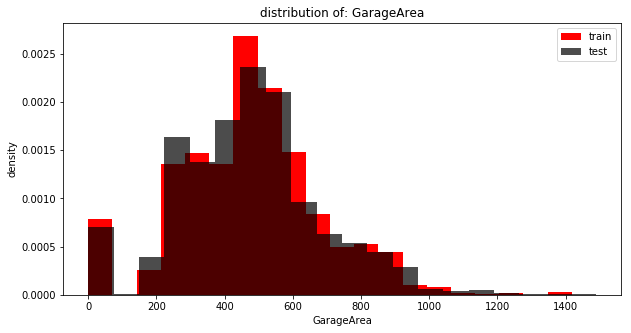

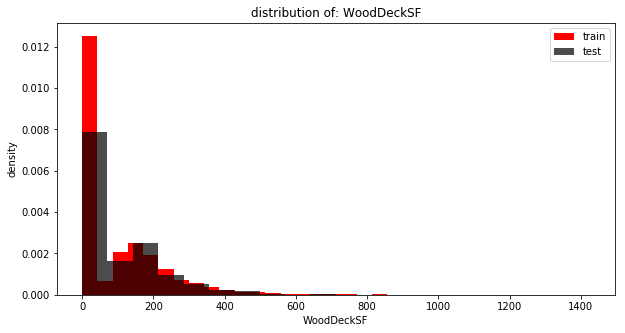

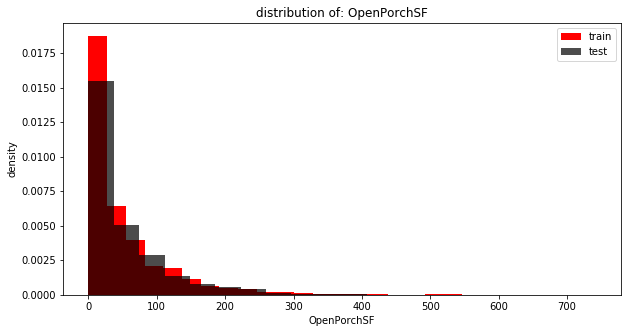

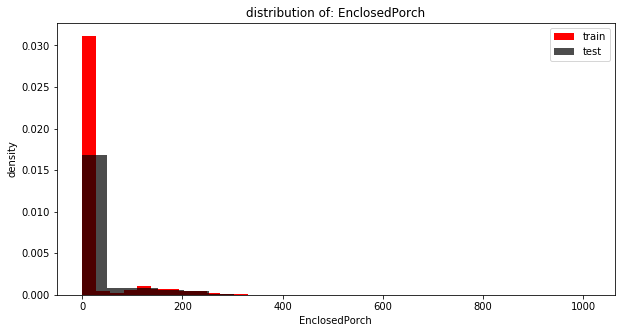

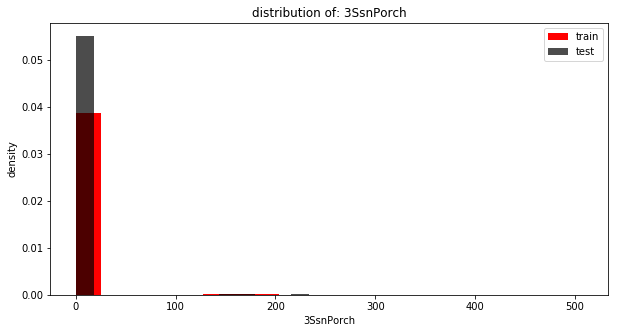

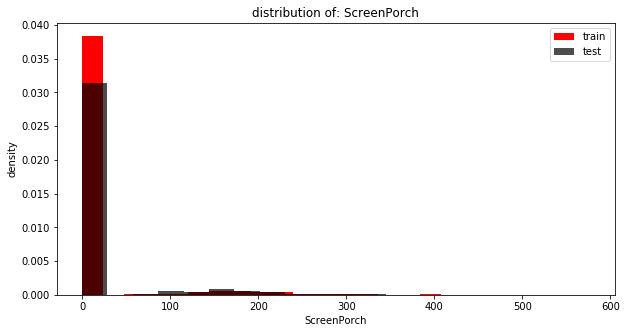

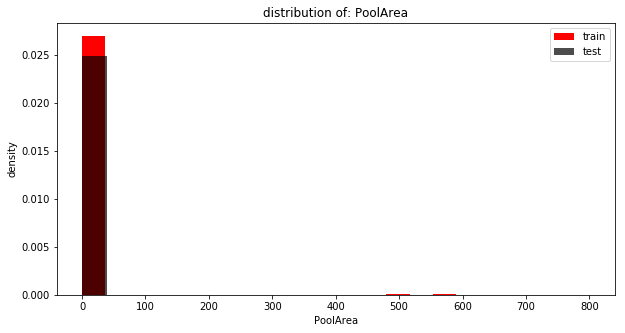

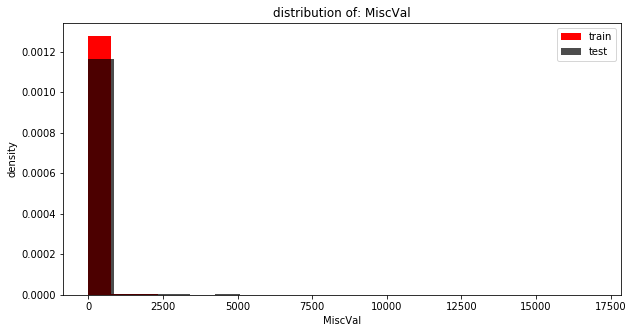

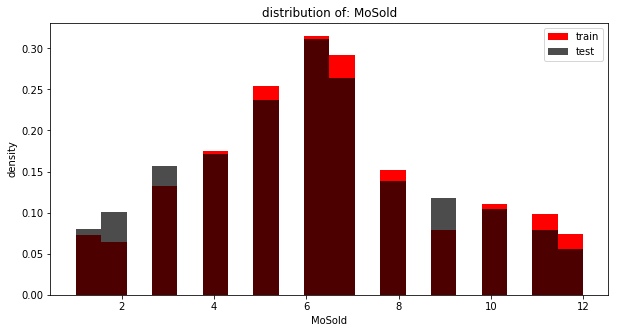

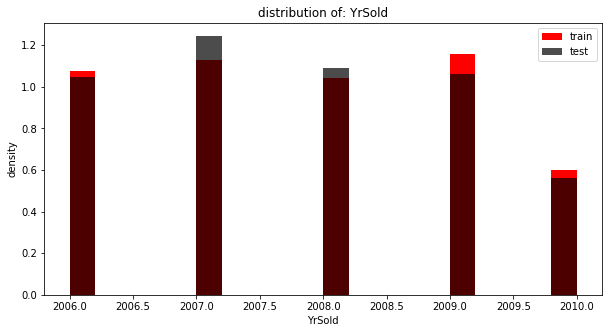

In [10]:
for c in numeric_c:
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,1,1)
    ax.hist(train[c],density=True, bins=20, color='r', label='train')
    ax.hist(test[c],density=True, bins=20, color='k', alpha=0.7, label='test')
    ax.set_title('distribution of: '+c )
    ax.set_xlabel(c)
    ax.set_ylabel('density')
    ax.legend(loc=0)
    fig.show()

no major diff. but still:

vars with some diff's in dist:
#lot area- train is *smaller* than test 
#basement_fin_sf1- train is *bigger* than test
#2nd floor sf- test have more 0 values
#low quality fin sf- train has more 0 values
test set has garageYrBlt==2200
check miscval

In [11]:
train.MiscVal.describe()

count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64

In [12]:
test.MiscVal.describe()

count     1459.000000
mean        58.167923
std        630.806978
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: MiscVal, dtype: float64

In [13]:
test.GarageYrBlt.describe()

count    1381.000000
mean     1977.721217
std        26.431175
min      1895.000000
25%      1959.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

In [14]:
test.YrSold.describe()

count    1459.000000
mean     2007.769705
std         1.301740
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

In [15]:
fix_year=test.loc[test.GarageYrBlt>2010].GarageYrBlt.index.values.tolist()

In [16]:
test.loc[fix_year,'GarageYrBlt']=np.nan

C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-pac

C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


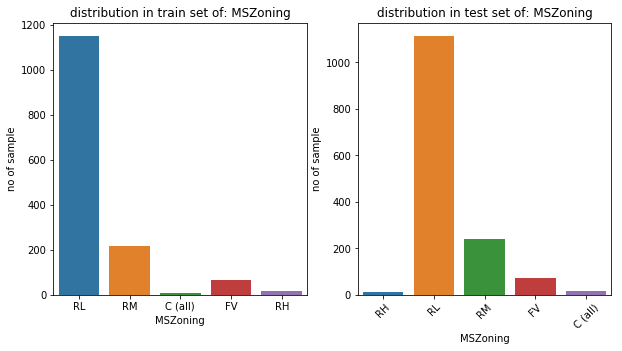

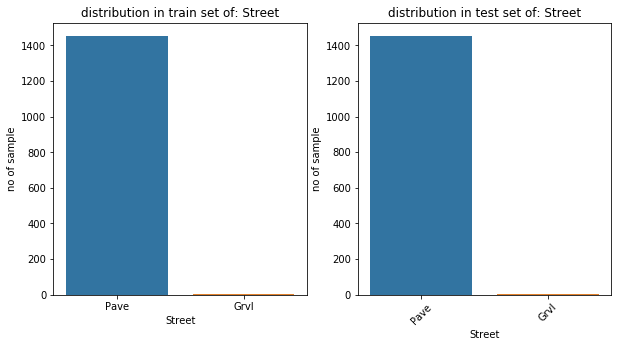

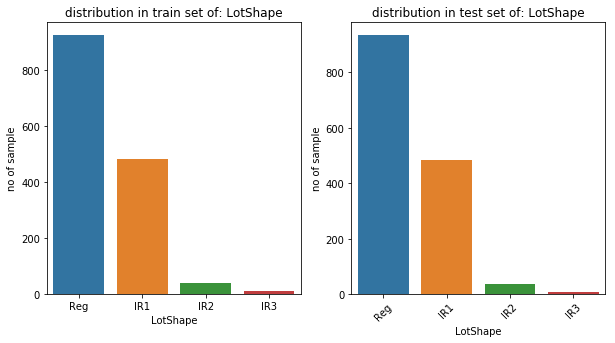

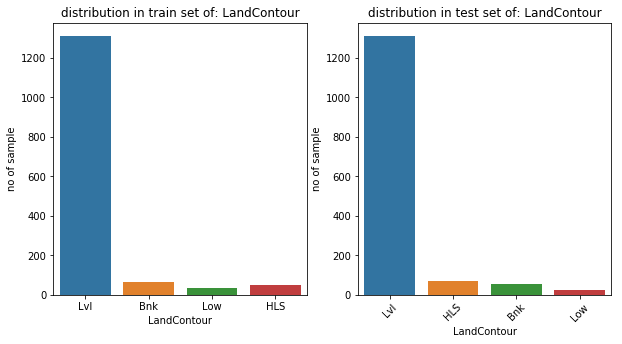

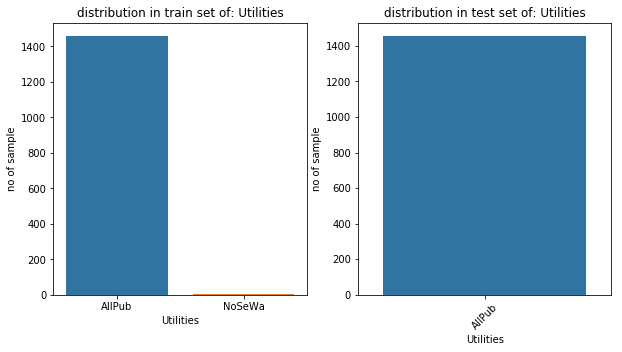

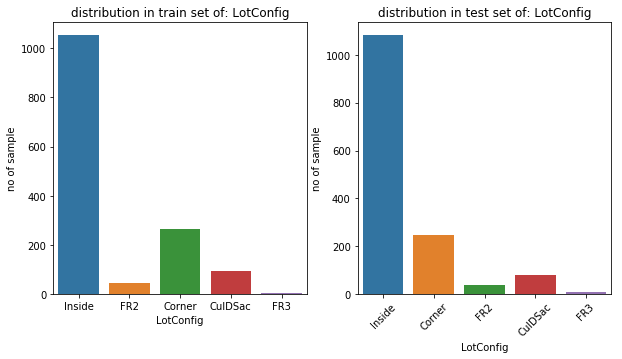

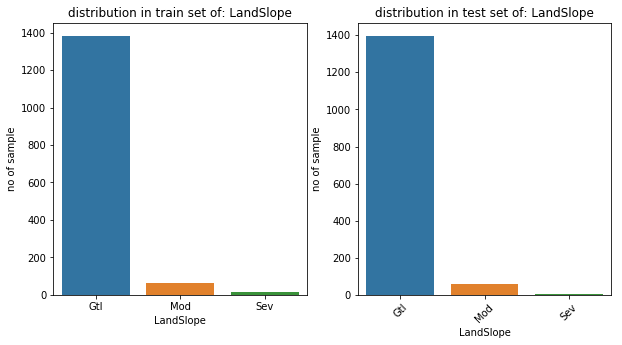

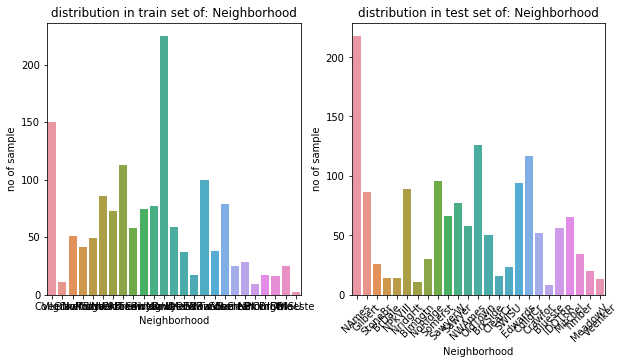

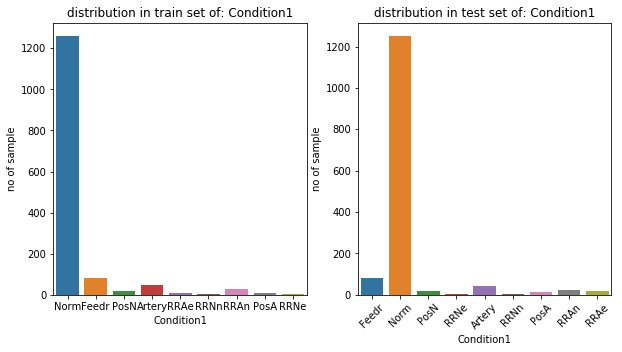

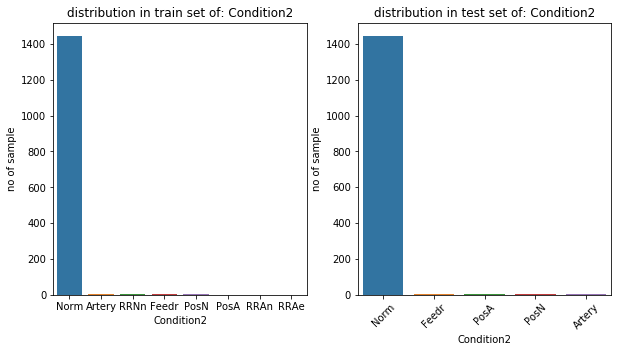

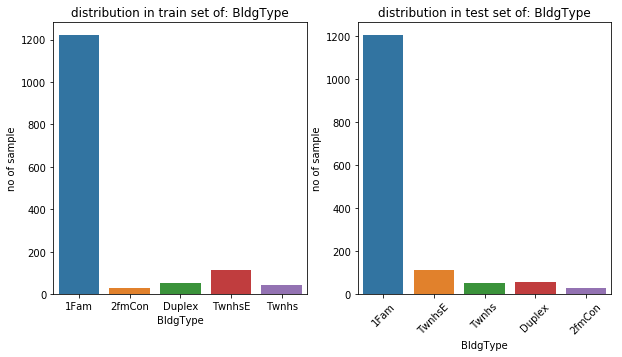

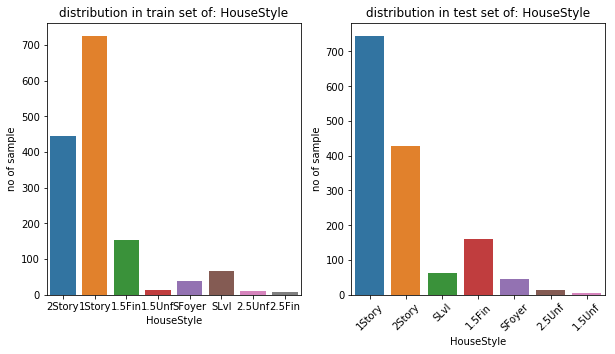

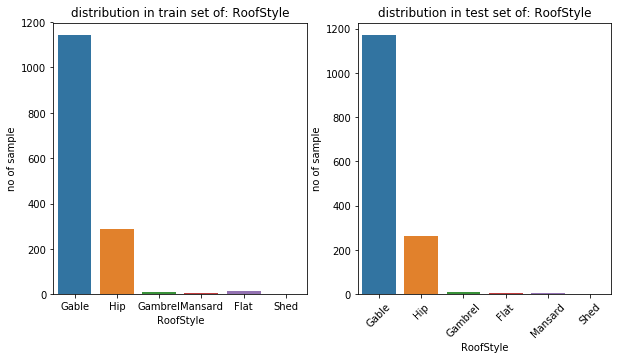

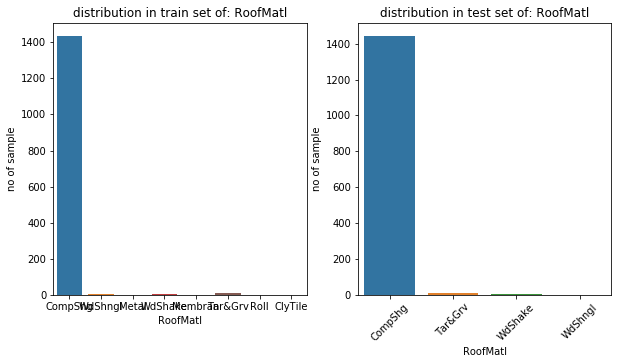

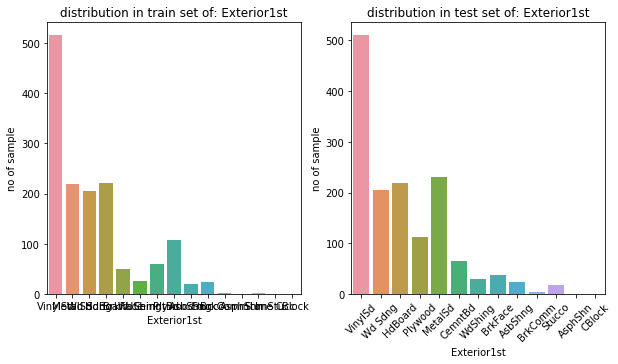

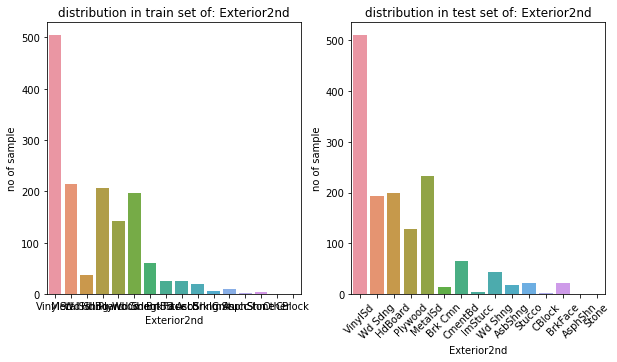

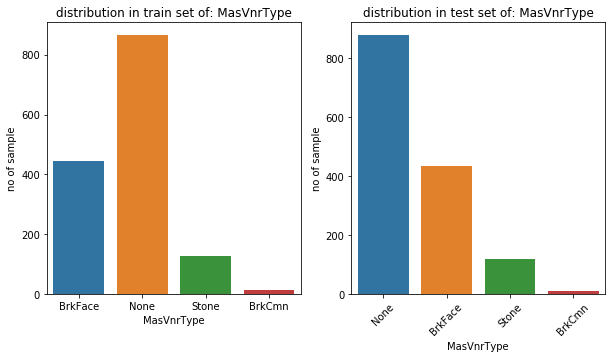

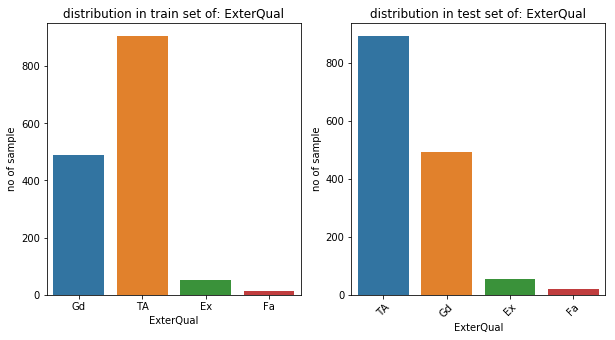

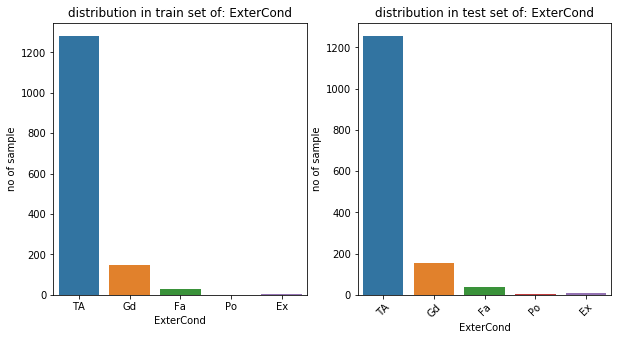

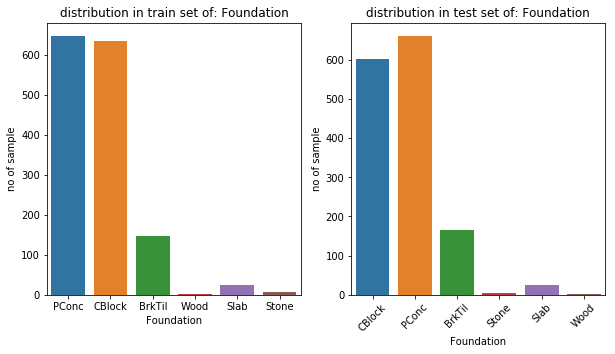

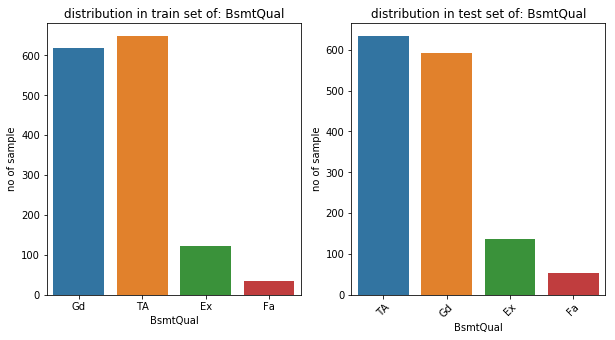

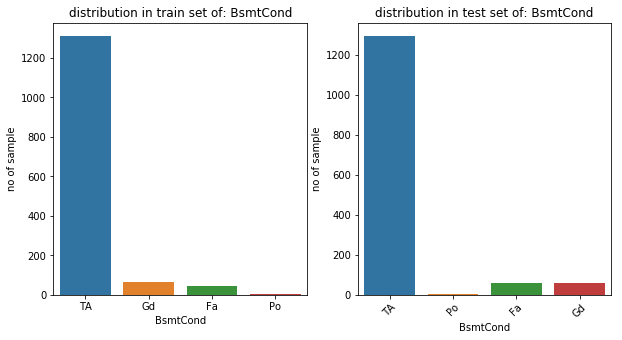

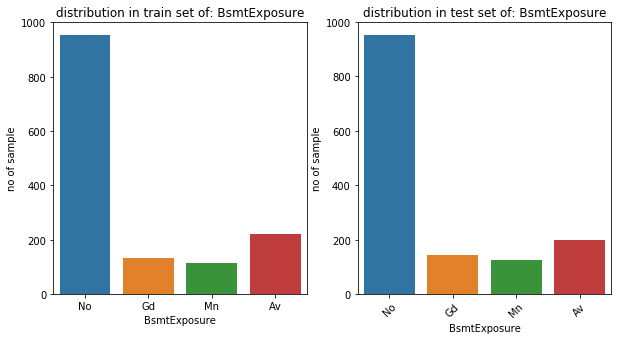

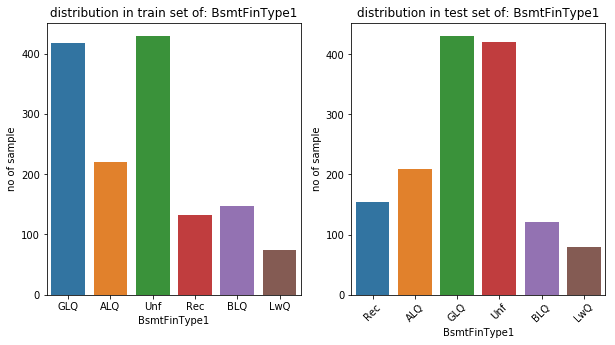

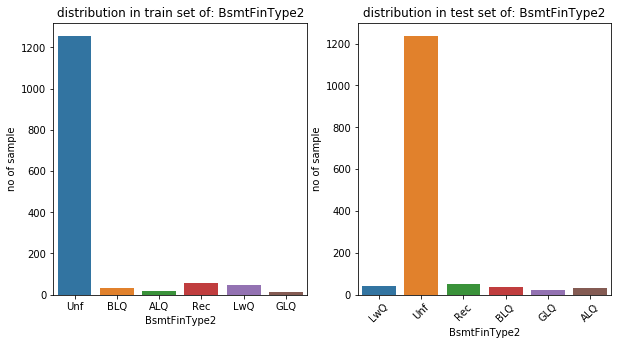

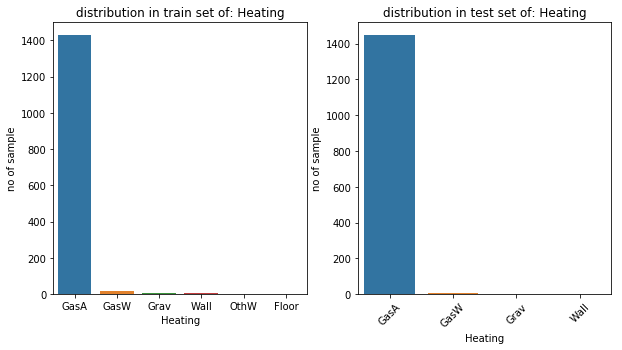

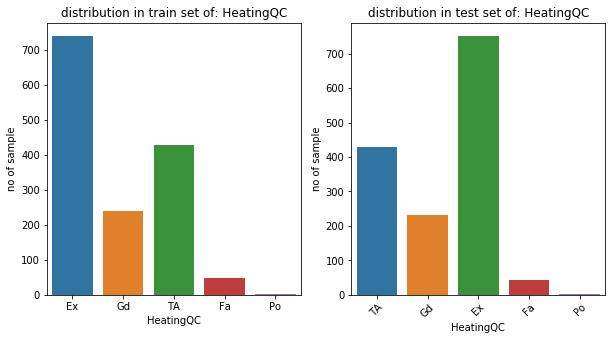

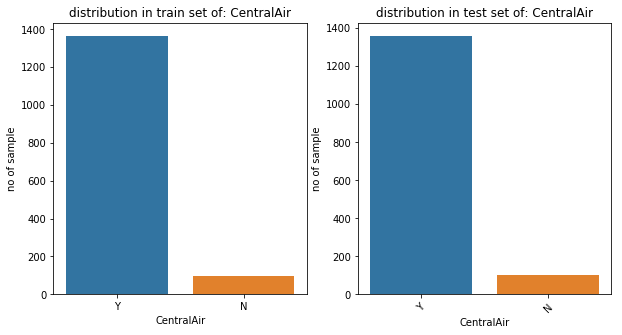

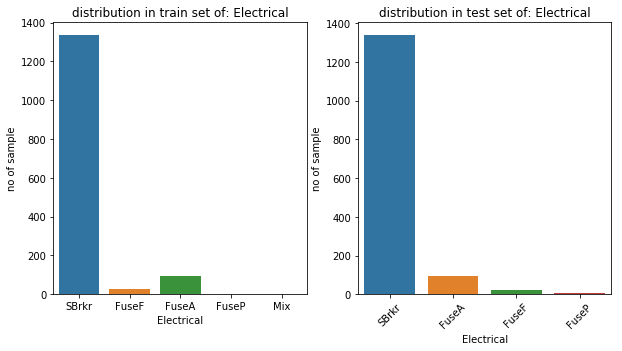

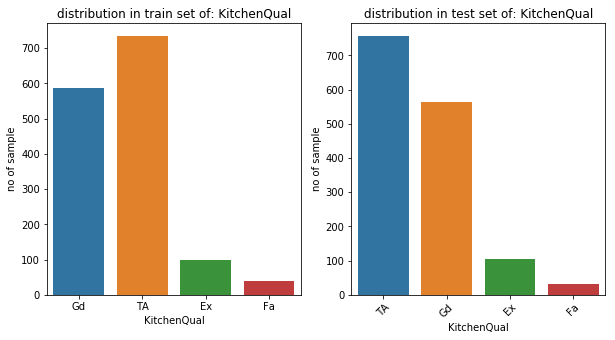

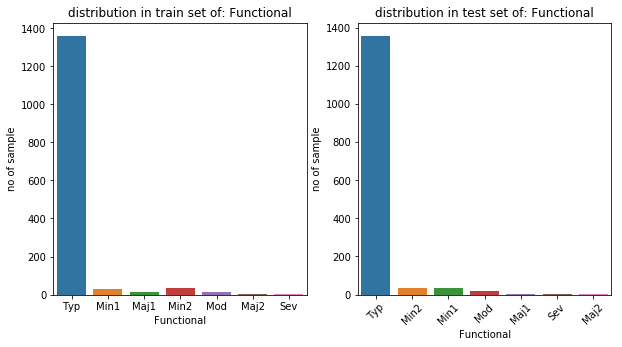

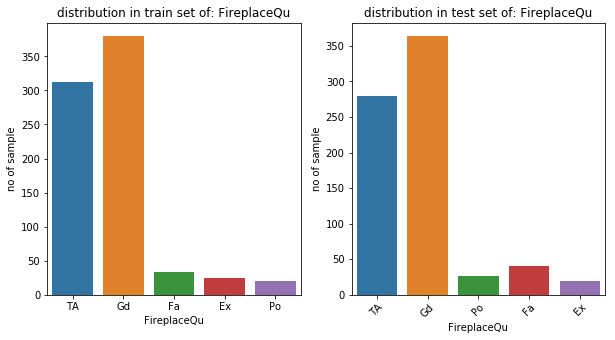

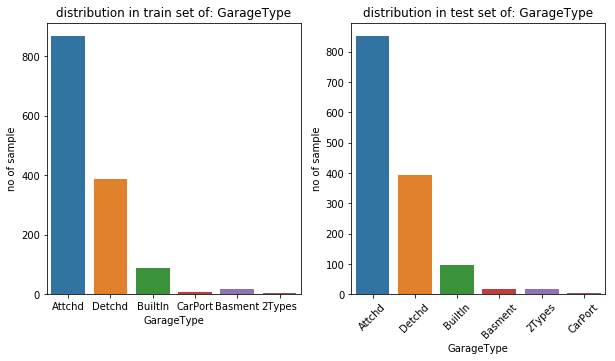

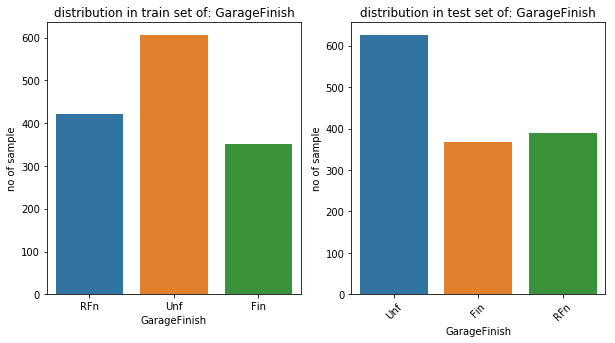

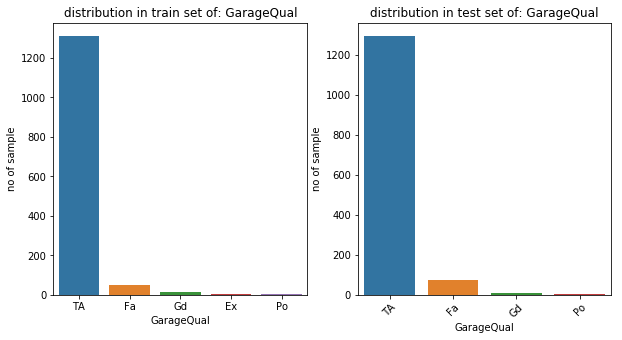

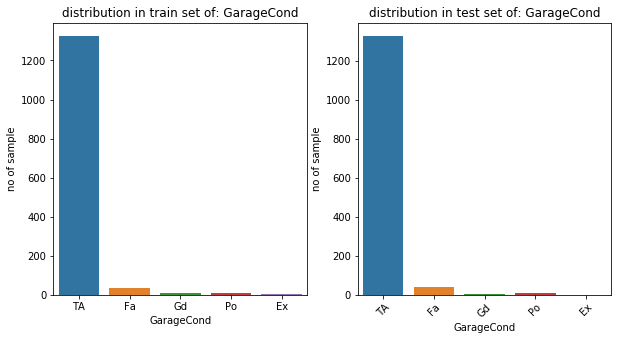

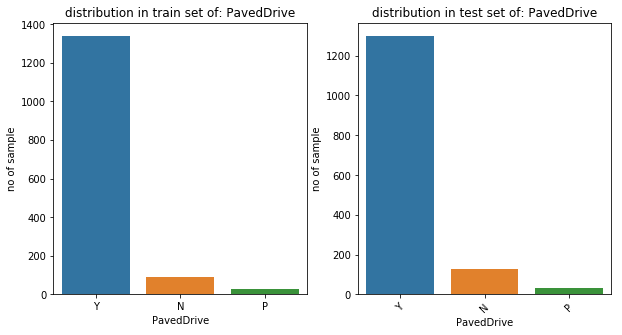

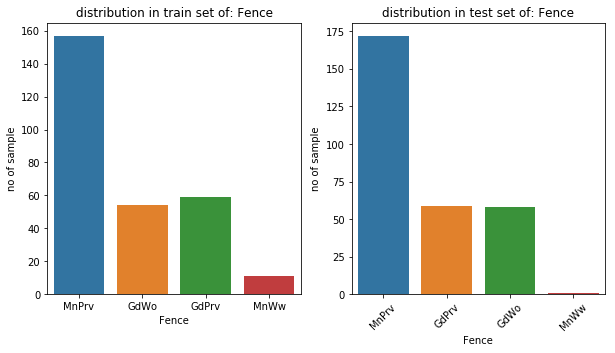

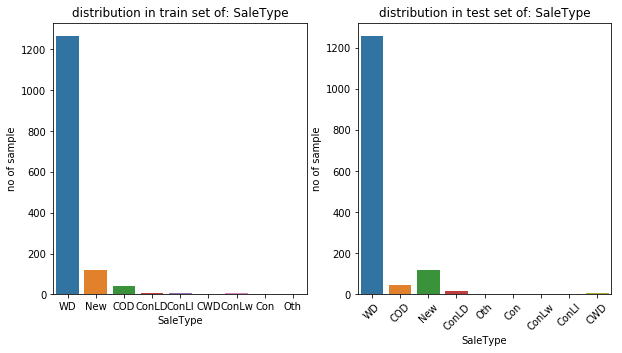

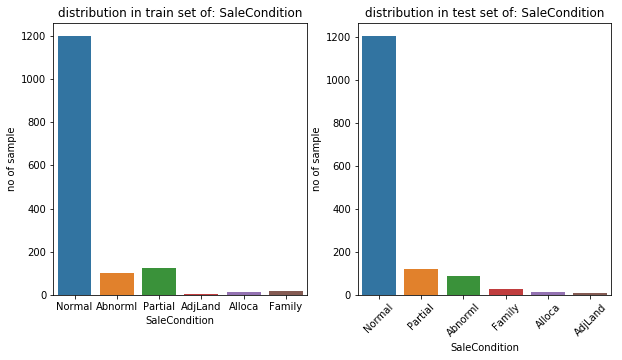

In [17]:
for c in cat_c:
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    ax = sns.countplot(x=train[c], data=train)
    ax.set_title('distribution in train set of: '+c)
    ax.set_ylabel('no of sample')
    plt.subplot(1,2,2)
    ax2 = sns.countplot(x=test[c], data=test)
    ax2.set_title('distribution in test set of: '+c)
    ax2.set_ylabel('no of sample')
    plt.xticks(rotation=45)
    fig.show()

in general theres no diff. thats good!

In [18]:
def make_dummies_conditional_on_len(train,c):
    df=train.groupby(c).Id.count()
    for i in df.index.tolist():
        if df.loc[i]>=100:
            name=str(c)+'_'+str(i)
            train[name]=np.where(train[c]==i,1,0)
    train.drop(c,axis=1, inplace=True)

In [19]:
for c in cat_c:
    make_dummies_conditional_on_len(train,c)

In [20]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,PavedDrive_Y,Fence_MnPrv,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,1,1,1,0,0,1,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,1,1,1,0,0,1,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,1,1,1,0,0,1,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,1,1,1,1,0,0,1,1,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,1,1,1,0,0,1,0,1,0


In [21]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [22]:
ctk=train.columns.tolist()
ctk.remove("Id")
ctk.remove('SalePrice')
ctk

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_Reg',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'LotConfig_Corner',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'Neighborhood_CollgCr',
 'Neighborhood_Edwards',
 'Neighborhood_NAmes',
 'Neighborhood_OldTown',
 'Condition1_Norm',
 'Condition2_Norm',
 'BldgType_1Fam',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Fin',
 'HouseStyle_1Story',
 'HouseStyle_2Story',
 'RoofStyle_Gable',
 'RoofStyle_Hip',
 

In [23]:
X=train[ctk]
y=train.SalePrice

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
linReg = linear_model.LinearRegression().fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

we have null values. lets clean them up

In [26]:
columns_to_clean=train.isnull().any().tolist()

In [27]:
train.loc[:,columns_to_clean].columns.tolist()

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

LotFrontage

In [28]:
train.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [29]:
train[train.LotFrontage.isnull()]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,PavedDrive_Y,Fence_MnPrv,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,0,1,1,1,0,0,1,0,1,0
12,13,20,NaN,12968,5,6,1962,1962,0.0,737,...,1,1,1,1,0,0,1,0,1,0
14,15,20,NaN,10920,6,5,1960,1960,212.0,733,...,0,1,1,1,0,0,1,0,1,0
16,17,20,NaN,11241,6,7,1970,1970,180.0,578,...,0,1,1,1,0,0,1,0,1,0
24,25,20,NaN,8246,5,8,1968,2001,0.0,188,...,1,1,1,1,1,0,1,0,1,0
31,32,20,NaN,8544,5,6,1966,2006,0.0,0,...,1,1,1,1,1,0,1,0,1,0
42,43,85,NaN,9180,5,7,1983,1983,0.0,747,...,0,1,0,1,1,0,1,0,1,0
43,44,20,NaN,9200,5,6,1975,1980,0.0,280,...,1,1,1,1,1,0,1,0,1,0
50,51,60,NaN,13869,6,6,1997,1997,0.0,182,...,0,1,1,1,0,0,1,0,1,0
64,65,60,NaN,9375,7,5,1997,1998,573.0,739,...,0,1,1,1,0,0,1,0,1,0


if i understand correctly, this missing values should be replaced with the mean of this variable

In [30]:
LotFrontage_to_fix=train[train.LotFrontage.isnull()].index.tolist()

In [31]:
train.loc[LotFrontage_to_fix,'LotFrontage']=train.LotFrontage.mean()

In [32]:
train.loc[LotFrontage_to_fix,'LotFrontage']

7       70.049958
12      70.049958
14      70.049958
16      70.049958
24      70.049958
31      70.049958
42      70.049958
43      70.049958
50      70.049958
64      70.049958
66      70.049958
76      70.049958
84      70.049958
95      70.049958
100     70.049958
104     70.049958
111     70.049958
113     70.049958
116     70.049958
120     70.049958
126     70.049958
131     70.049958
133     70.049958
136     70.049958
147     70.049958
149     70.049958
152     70.049958
153     70.049958
160     70.049958
166     70.049958
          ...    
1300    70.049958
1301    70.049958
1309    70.049958
1312    70.049958
1318    70.049958
1321    70.049958
1342    70.049958
1346    70.049958
1348    70.049958
1354    70.049958
1356    70.049958
1357    70.049958
1358    70.049958
1362    70.049958
1365    70.049958
1368    70.049958
1373    70.049958
1381    70.049958
1383    70.049958
1396    70.049958
1407    70.049958
1417    70.049958
1419    70.049958
1423    70.049958
1424    70

MasVnrArea-Masonry veneer area in square feet

In [33]:
train.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [34]:
train[train.MasVnrArea.isnull()]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,PavedDrive_Y,Fence_MnPrv,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
234,235,60,70.049958,7851,6,5,2002,2002,NaN,625,...,0,1,1,1,0,0,1,0,1,0
529,530,20,70.049958,32668,6,3,1957,1975,NaN,1219,...,0,1,1,1,0,0,1,0,0,0
650,651,60,65.000000,8125,7,6,2007,2007,NaN,0,...,0,1,1,1,0,0,1,0,1,0
936,937,20,67.000000,10083,7,5,2003,2003,NaN,833,...,0,1,1,1,0,0,1,0,1,0
973,974,20,95.000000,11639,7,5,2007,2008,NaN,0,...,0,1,1,1,0,1,0,0,0,1
977,978,120,35.000000,4274,7,5,2006,2007,NaN,1106,...,0,1,1,1,0,1,0,0,0,1
1243,1244,20,107.000000,13891,10,5,2006,2006,NaN,1386,...,0,1,1,1,0,1,0,0,0,1
1278,1279,60,75.000000,9473,8,5,2002,2002,NaN,804,...,0,1,1,1,0,0,1,0,1,0


it seems this var should be equal to 0 in this case

In [35]:
MasVnrArea_to_fix=train[train.MasVnrArea.isnull()].index.tolist()
train.loc[MasVnrArea_to_fix,'MasVnrArea']=0
train.loc[MasVnrArea_to_fix,'MasVnrArea']

234     0.0
529     0.0
650     0.0
936     0.0
973     0.0
977     0.0
1243    0.0
1278    0.0
Name: MasVnrArea, dtype: float64

lastly we have GarageYrBlt which is "Year garage was built". i suspect the missing values are because theres no garage

In [36]:
train[train.GarageYrBlt.isnull()].GarageArea.describe()

count    81.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: GarageArea, dtype: float64

the missing values are only in casses where GarageArea==0 so theres no garage! therefor i will change their values to mean fo garageYrBlt

In [37]:
GarageYrBlt_to_fix=train[train.GarageYrBlt.isnull()].index.tolist()
train.loc[GarageYrBlt_to_fix,'GarageYrBlt']=train.GarageYrBlt.mean().round(0)
train.loc[GarageYrBlt_to_fix,'GarageYrBlt']

39      1979.0
48      1979.0
78      1979.0
88      1979.0
89      1979.0
99      1979.0
108     1979.0
125     1979.0
127     1979.0
140     1979.0
148     1979.0
155     1979.0
163     1979.0
165     1979.0
198     1979.0
210     1979.0
241     1979.0
250     1979.0
287     1979.0
291     1979.0
307     1979.0
375     1979.0
386     1979.0
393     1979.0
431     1979.0
434     1979.0
441     1979.0
464     1979.0
495     1979.0
520     1979.0
         ...  
954     1979.0
960     1979.0
968     1979.0
970     1979.0
976     1979.0
1009    1979.0
1011    1979.0
1030    1979.0
1038    1979.0
1096    1979.0
1123    1979.0
1131    1979.0
1137    1979.0
1143    1979.0
1173    1979.0
1179    1979.0
1218    1979.0
1219    1979.0
1234    1979.0
1257    1979.0
1283    1979.0
1323    1979.0
1325    1979.0
1326    1979.0
1337    1979.0
1349    1979.0
1407    1979.0
1449    1979.0
1450    1979.0
1453    1979.0
Name: GarageYrBlt, Length: 81, dtype: float64

lets try the regression again

In [ ]:
X=train[ctk]
y=train.SalePrice
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
linReg = linear_model.LinearRegression().fit(x_train,y_train)

In [ ]:
y_pred=linReg.predict(x_test)

In [ ]:
plt.scatter(y_pred,y_test, s=1)

In [ ]:
linReg.score(x_test, y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
log_pred=np.log(y_pred)
log_test=np.log(y_test)

mse = mean_squared_error(log_pred,log_test)

rmse = np.sqrt(mse)

rmse

In [ ]:
plt.scatter(log_pred,log_test, s=5)

In [ ]:
import statsmodels.api as sm
regressor_OLS = sm.OLS(y_train,x_train).fit()
regressor_OLS.summary()

we can see two very important things:
1. there are a lot of features that seems un-correlated with saleprice. we should understand why and if we can "save" them or should just drop them.
2. it seems the variance is changing along the predicted line. we should see how to fix it b.c it break the assumption of residual errors

In [ ]:
regressor_OLS.pvalues[regressor_OLS.pvalues>0.5]

lets start really explore the data!

In [ ]:
df=pd.read_csv('../data/train.csv')

it seems MS info is not helping(ie.-MSSubClass, MSZoning_RM and also MSZoning_RL). lets understand why

In [ ]:
pd.pivot_table(df,index=["MSSubClass"], columns=["MSZoning"],values=['SalePrice'], aggfunc=['count', 'mean'], margins=True)

we see high variance but its non linear.

lets keep only cases where there are more then 20 examples (as categorial variable)

work ahead:
1. treating MSSubClass as categorical var.
2. MSSubClass and HouseStyle suppose to be higly correlated
3. YearBuilt and YearRemodAdd mostly should have the same data. maybe we can pass on YearBuilt.
4. ExterQual and ExterCond could be dealt as orderd list.
5. the same with BsmtQual and BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2.
6. a new variable could be a ratio between TotalBsmtSF and other basement var's.
7. HeatingQC as 4 and 5.
8. KitchenQual as 7.
9. Functional also.
10. GarageFinish the same.
11. GarageQual the same.
12. GarageCond the same.
13. Fence the same (but more complicated)
14. MiscFeature might be dropped.
15. MoSold and YrSold might be used to see if there is a time trend.


In [ ]:
df.head()

# 1&2

In [ ]:
df.groupby(['MSSubClass','HouseStyle']).Id.count().unstack()

looking at the columns there is some variability but looking at the rows we see for each row almost all the instances are in one column.

therefor we remove 'HouseStyle'

In [ ]:
df.drop('HouseStyle', axis=1, inplace=True)

In [ ]:
def turn_MS_data_into_cat(df):
    for i in df.MSSubClass.unique().tolist():
        for j in df.MSZoning.unique().tolist():
            if df[(df.MSSubClass==i)&(df.MSZoning==j)].Id.count()>=20:
                name=str(i)+'_'+str(j)
                df[name]=np.where((df.MSSubClass==i)&(df.MSZoning==j),1,0)
    df.drop(['MSSubClass','MSZoning'], axis=1, inplace=True)
    

In [ ]:
turn_MS_data_into_cat(df)
df.head()

# 3

In [ ]:
plt.scatter(df.YearBuilt, df.YearRemodAdd)

In [ ]:
(df.YearRemodAdd-df.YearBuilt).any()<0

we can see 2 things- (1): theres a problem in data. no house was renovated before 1950. (2) all houses were renovated after they were built (which is a good thing)

i think we can get rid of yearbuilt

In [ ]:
df.drop('YearBuilt', axis=1, inplace=True)

we can add age of house when sold as a variable

In [ ]:
df['HouseAge']=df.YrSold-df.YearRemodAdd

In [ ]:
df['HouseAge'].describe()

theres a house that was renovated after sold. thats bad!. lets check it out.

In [ ]:
print('renovated at:', df[df['HouseAge']<0].YearRemodAdd.values, 'sold on: ', df[df['HouseAge']<0].MoSold.values, '-' ,df[df['HouseAge']<0].YrSold.values)

seems like a typo. lets change it to renovated at 2007. also lets check if test data have the same problem

In [ ]:
df.loc[df[df['HouseAge']<0].index.tolist(),'YearRemodAdd']=2007

In [ ]:
test[test.YearRemodAdd>test.YrSold].YrSold, test[test.YearRemodAdd>test.YrSold].YearRemodAdd 

once again lets fix that

In [ ]:
test.loc[test[test.YearRemodAdd>test.YrSold].index, 'YearRemodAdd']=2007

# 4-6

In [ ]:
df.groupby(['ExterQual', 'ExterCond']).Id.count().unstack()

In [ ]:
Quality_scale={np.nan:0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

In [ ]:
df.ExterQual=df.ExterQual.map(Quality_scale)

In [ ]:
df.ExterCond=df.ExterCond.map(Quality_scale)

the basement is more tricky cause sometimes there's no basement. it will need a different approach, possibly by creating new variables.

I will create one new variable to sum all the bsmnt properties

In [ ]:
df.loc[:,'BsmtQual':'TotalBsmtSF']

In [ ]:
df.BsmtFinType1.unique()

In [ ]:
df.BsmtQual=df.BsmtQual.map(Quality_scale)
df.BsmtCond=df.BsmtCond.map(Quality_scale)

Quality_scale2={np.nan:0,'No':1, 'Mn':2, 'Av':3, 'Gd':4}

df.BsmtExposure=df.BsmtExposure.map(Quality_scale2)

Quality_scale3={np.nan:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}

df.BsmtFinType1=df.BsmtFinType1.map(Quality_scale3)
df.BsmtFinType2=df.BsmtFinType2.map(Quality_scale3)


In [ ]:
df.loc[:,'BsmtQual':'TotalBsmtSF'].isnull().any()

In [ ]:
def total_basement_quality(df):
    if df.TotalBsmtSF!=0:
        base_score=df.BsmtQual*df.BsmtCond*df.BsmtExposure
        avg_score=df.BsmtFinType1*(df.BsmtFinSF1/df.TotalBsmtSF)+df.BsmtFinType2*(df.BsmtFinSF2/df.TotalBsmtSF)+(df.BsmtUnfSF/df.TotalBsmtSF)
        return base_score*avg_score*df.TotalBsmtSF
    

In [ ]:
df['total_basement_quality']=df.apply(total_basement_quality, axis=1)

In [ ]:
df.loc[:10,"BsmtQual":"TotalBsmtSF"]

In [ ]:
df.loc[:10,'total_basement_quality']

In [ ]:
df.shape

In [ ]:
df.drop(['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'], axis=1, inplace=True)

In [ ]:
df.shape

# 7-8

In [ ]:
df.groupby('HeatingQC').Id.count()

In [ ]:
df.HeatingQC=df.HeatingQC.map(Quality_scale)

In [ ]:
df.KitchenQual=df.KitchenQual.map(Quality_scale)

# 9- for now stop this because of glib notes

Functional also.
GarageFinish the same.
GarageQual the same.
GarageCond the same.
Fence the same (but more complicated)
MiscFeature might be dropped.
MoSold and YrSold might be used to see if there is a time trend.

In [ ]:
df.groupby('YrSold').Id.count()

# things to do now

1. check if theres a time trend (there should be a complex one because of the 2008-9 economic crisis
2. check what is the best way to analyze the target(regular, log, sqrt, price per sf)
3. change OverallQual, OverallCond to categorical var's
4. try to add dummies for 2-bedrooms, 3-bedrooms and so on

In [ ]:
df['temp']=df.apply(lambda x: str(x.YrSold)+'-'+str(x.MoSold), axis=1)

In [ ]:
df['SaleDate']=pd.to_datetime(df['temp'])
df.drop('temp', axis=1, inplace=True)

In [ ]:
sorted(df['SaleDate'])

In [ ]:
plt.scatter(sorted(df['SaleDate']), df.SalePrice)

In [ ]:
df['Log_sale_price']=np.log10(df.SalePrice)
df['squre_root_sale_price']=np.sqrt(df.SalePrice)
df['Price_per_sf']=df.SalePrice/df.GrLivArea

In [ ]:
df['SalePrice'].hist(bins=50)

In [ ]:
df['Log_sale_price'].hist(bins=50)

In [ ]:
df['squre_root_sale_price'].hist(bins=50)

In [ ]:
df['Price_per_sf'].hist(bins=50)

In [ ]:
for c in ['SalePrice', 'Log_sale_price', 'squre_root_sale_price','Price_per_sf']:

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,2,1)
    ax.hist(df[c],bins=50)
    ax.set_title('distribution of: '+c )
    ax.set_xlabel(c)
    ax.set_ylabel('density')

    bx=fig.add_subplot(1,2,2)
    bx.scatter(sorted(df['SaleDate']), df[c])
    bx.set_xlabel('SaleDate')
    bx.set_ylabel(c)
    fig.show()

no obvious time trend. i will deal with that later

In [ ]:
import scipy

In [ ]:
scipy.stats.normaltest(df.SalePrice)[1]

In [ ]:
#'Log_sale_price', 'squre_root_sale_price','Price_per_sf'
scipy.stats.normaltest(df.Log_sale_price)[1]

In [ ]:
scipy.stats.normaltest(df.squre_root_sale_price)[1]

In [ ]:
scipy.stats.normaltest(df.Price_per_sf)[1]

non of our distributions are normal. but the log is closest to normal(cause the p-value is the largest). lets try also log_price for SF

In [ ]:
df['log_saleprice_per_sf']=np.log(df['Price_per_sf'])

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.hist(df['log_saleprice_per_sf'],bins=50)
ax.set_title('distribution of: log_saleprice_per_sf' )
ax.set_xlabel('log_saleprice_per_sf')
ax.set_ylabel('density')

bx=fig.add_subplot(1,2,2)
bx.scatter(sorted(df['SaleDate']), df['log_saleprice_per_sf'])
bx.set_xlabel('SaleDate')
bx.set_ylabel('log_saleprice_per_sf')
fig.show()

In [ ]:
scipy.stats.normaltest(df.log_saleprice_per_sf)[1]

nope, its not more normal than just log_price.

# change OverallQual, OverallCond to categorical var's

In [ ]:
df.groupby('OverallQual').Id.count()

In [ ]:
df.groupby('OverallCond').Id.count()

In [ ]:
map_overall_to_cat={10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:'Above Average',5:'Average',4:'Below Average',
                    3:'Fair',2:'Poor',1:'Very Poor'}

In [ ]:
df.OverallCond=df.OverallCond.map(map_overall_to_cat)
df.OverallQual=df.OverallQual.map(map_overall_to_cat)

# try to add dummies for 2-bedrooms, 3-bedrooms and so on

In [ ]:
df.groupby('BedroomAbvGr').Id.count()

In [ ]:
df=pd.concat([df,pd.get_dummies(df.BedroomAbvGr, prefix="br")], axis=1)

In [ ]:
df.columns.tolist()

In [ ]:
y=df.Log_sale_price
list_to_remove=['Log_sale_price', 'SalePrice','MoSold',
 'YrSold',
 'squre_root_sale_price',
 'Price_per_sf',
 'log_saleprice_per_sf]